<h1>
<center>CFRM 421/521, Spring 2022</center>
</h1>

<h1>
<center>Daniel Eduardo Oliver</center>
</h1>

<h1>
<center>Homework 3</center>
</h1>

* **Due: Monday, May 16, 2022, 11:59 PM**


* Total marks: 37


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as one Jupyter notebook on Canvas and one PDF file on Gradescope.** The notebook must be already run, that is, make sure that you have run all your code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. Applying PCA [6 marks]

## (a) [4 marks]
Train a SVM classifier with a Gaussian RBF kernel on the MNIST training data (the first 60,000 observations). Use the default arguments for the classifier. Take the first 10,000 observations as the training set given by `X_train_red` and `y_train_red` in the code below. Time your training using `%time` and report the accuracy of the trained model on the test set (the last 10,000 observations of MNIST). Now, use PCA on the original training set (60,0000 observations) to find principal components with an explained variance ratio of 60%. Retrain the SVM classifier using these principal components instead of the original features. Time the training and accuracy on the test set. Comment on whether PCA helped or not. Do not shuffle the data and do not use a standard scaler.

In [2]:
import numpy as np

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)
X_train = mnist["data"][:60000]
X_test  = mnist["data"][60000:]
y_train = mnist["target"][:60000]
y_test  = mnist["target"][60000:]
X_train_red = mnist["data"][:10000]
y_train_red = mnist["target"][:10000]

In [3]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

kernel_SVC = Pipeline([("svc", SVC(kernel='rbf'))])

%timeit kernel_SVC.fit(X_train_red, y_train_red)


10 s ± 337 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
score = kernel_SVC.score(X_test, y_test)

In [5]:
print(score)

0.9594


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.6) #passing a fraction tells the model how much variance we are trying to explain
pca.fit(X_train)

PCA(n_components=0.6)

In [7]:
ratios = pca.explained_variance_ratio_
print("17 principal components are needed to explain", sum(ratios), "of the variance.")

17 principal components are needed to explain 0.6074124552802459 of the variance.


In [8]:
X17D = pca.transform(X_train) #this grabs the principal components (must use after fitting)

In [9]:
kernel_SVC2 = Pipeline([("svc", SVC(kernel='rbf'))])
%timeit kernel_SVC2.fit(X17D, y_train)

18.7 s ± 737 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
X17D_test = pca.transform(X_test)
score2 = kernel_SVC2.score(X17D_test, y_test)

In [11]:
#revisite the commentary regarding the speed! since the comparison is between a data train of 10,000 and the other 60,000
# print("PCA did not help, the accuracy score has decreased substantially even though it was faster to train. With PCA, the accuracy is", score2, "with a time to trian of 19.3 seconds on average. Comparably, the SVM without PCA took had an accuracy of", score," and an average training time of 9.81 seconds" )
# print(score2)
print("Accuracy of test set with PCA:")
print(score2)
print("PCA did help, he accuracy score using the the transformed features ishigher than the non-transformed features.")

Accuracy of test set with PCA:
0.9723
PCA did help, he accuracy score using the the transformed features ishigher than the non-transformed features.


**[Add your solution here]**

## (b) [2 marks]

Repeat (a) using a random forest classifier instead of the SVM classifier and comment on the result. Use `random_state=42` in the classifier and use the default for the other arguments. You are allowed to use `n_jobs=-1`.

In [12]:
from sklearn.ensemble import RandomForestClassifier

kernel_rfc = Pipeline([("rfc", RandomForestClassifier(random_state=42, n_jobs=-1))])

%timeit kernel_rfc.fit(X_train_red, y_train_red)

833 ms ± 8.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
score3 = kernel_rfc.score(X_test, y_test)

In [14]:
pca3 = PCA(n_components=0.6) #passing a fraction tells the model how much variance we are trying to explain
pca3.fit(X_train)

PCA(n_components=0.6)

In [15]:
ratios3 = pca.explained_variance_ratio_
print(len(ratios3)," principal components are needed to explain", sum(ratios), "of the variance.")

17  principal components are needed to explain 0.6074124552802459 of the variance.


In [16]:
X17D_rfc = pca3.transform(X_train) #this grabs the principal components ( use .transform() after fitting)

In [17]:
kernel_rfc2 = Pipeline([("rfc", RandomForestClassifier(random_state=42, n_jobs=-1))])
%timeit kernel_rfc2.fit(X17D_rfc, y_train)

5.98 s ± 609 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
pca4 = PCA(n_components=17) #it is necessary to also find the same number of principal components but on the TEST SET, then transform into PCAs that are used for final prediction
pca4.fit(X_train)

PCA(n_components=17)

In [19]:
X17D_test = pca4.transform(X_test)
score4 = kernel_rfc2.score(X17D_test, y_test)

In [20]:
print("By observing the accuracy score, it appears that PCA did not help the accuracy of the model in this case.")
print(score3, score4)

By observing the accuracy score, it appears that PCA did not help the accuracy of the model in this case.
0.9504 0.9434


**[Add your solution here]**

# 2. Visualizing dimensionality reduction [8 marks]

## (a) [3 marks]
Load the MNIST dataset and take only the first 10,000 observations as `X` and `y`. Use the nonlinear dimensionality reduction technique **t-SNE** to reduce this subset of the MNIST dataset down to 2 dimensions. Include the argument `random_state=42`. Measure how long it took to reduce the dimensionality, this will be used in (b) below. Plot a scatterplot of the outcome of t-SNE. Use 10 different colors to represent each image's target class and plot scaled-down versions of the digit images themselves. The visualization will be too cluttered if you draw the image for every observation, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance. You should get a nice visualization of different classes and some of the digit images in them. Use the plot to comment on which classes are easily identified and which ones can be hard to distinguish.

Hint: It is helpful to read page 233 of the textbook for information about t-SNE, and see the solution of Chapter 8, Question 10 in this [Jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/08_dimensionality_reduction.ipynb) on the textbook website to see how to implement t-SNE and produce these plots using the `plot_digits()` function.

In [21]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)

X = mnist["data"][:10000]
y = mnist["target"][:10000]

In [22]:
from sklearn.manifold import TSNE #can be found on book's github ch 8
import time
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)

start = time.time()
X_reduced_tsne = tsne.fit_transform(X)
end = time.time()
print(end - start)


66.86956357955933


In [23]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

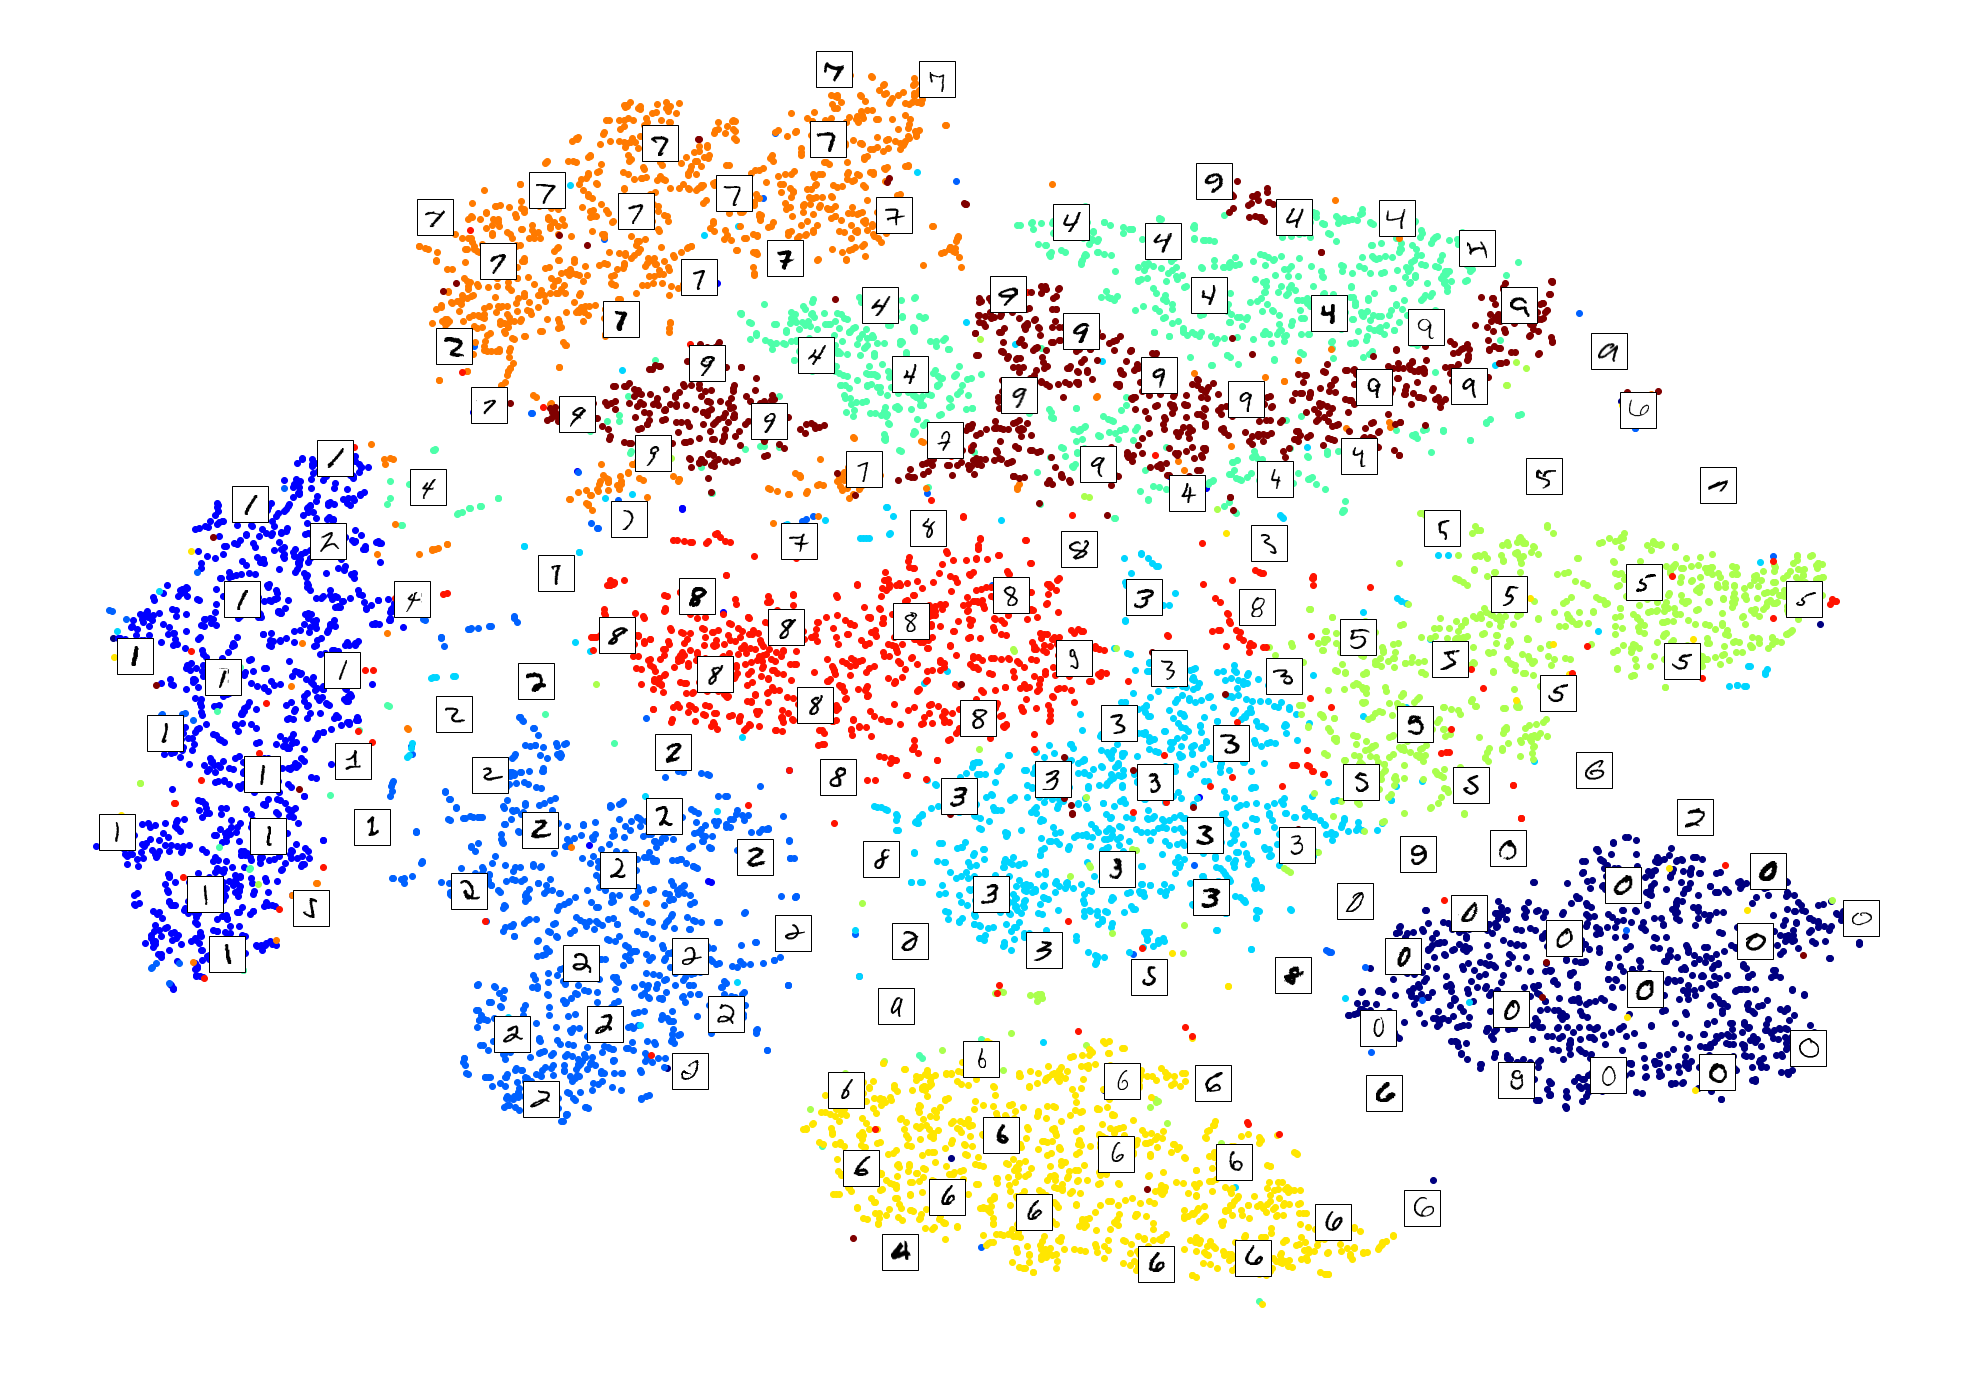

In [24]:
#reference jupyter notebook linked above
plot_digits(X_reduced_tsne, y, images=X, figsize=(35, 25))

In [25]:
print("It seems that 4s and 9s seem to be the most hard to distinguish.")


It seems that 4s and 9s seem to be the most hard to distinguish.


**[Add your solution here]**

## (b) [5 marks]
Try using other dimensionality reduction methods. Specifically, try:

* Regular PCA to reduce to 2 dimensions.
* LLE to reduce to 2 dimensions.
* First apply PCA with an explained variance ratio of 95%, then apply t-SNE to reduce to 2 dimensions.

For each algorithm, include the argument `random_state=42`. Then for each of the three methods above, report how long it took to reduce the dimension. Also, provide a 2D plot of the results. Which method runs faster? Which one results in a better visualization? Include t-SNE from (a) as part of your comparison.

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
start = time.time()
X2D = pca.fit_transform(X)
end = time.time()
print(end - start)

0.16651201248168945


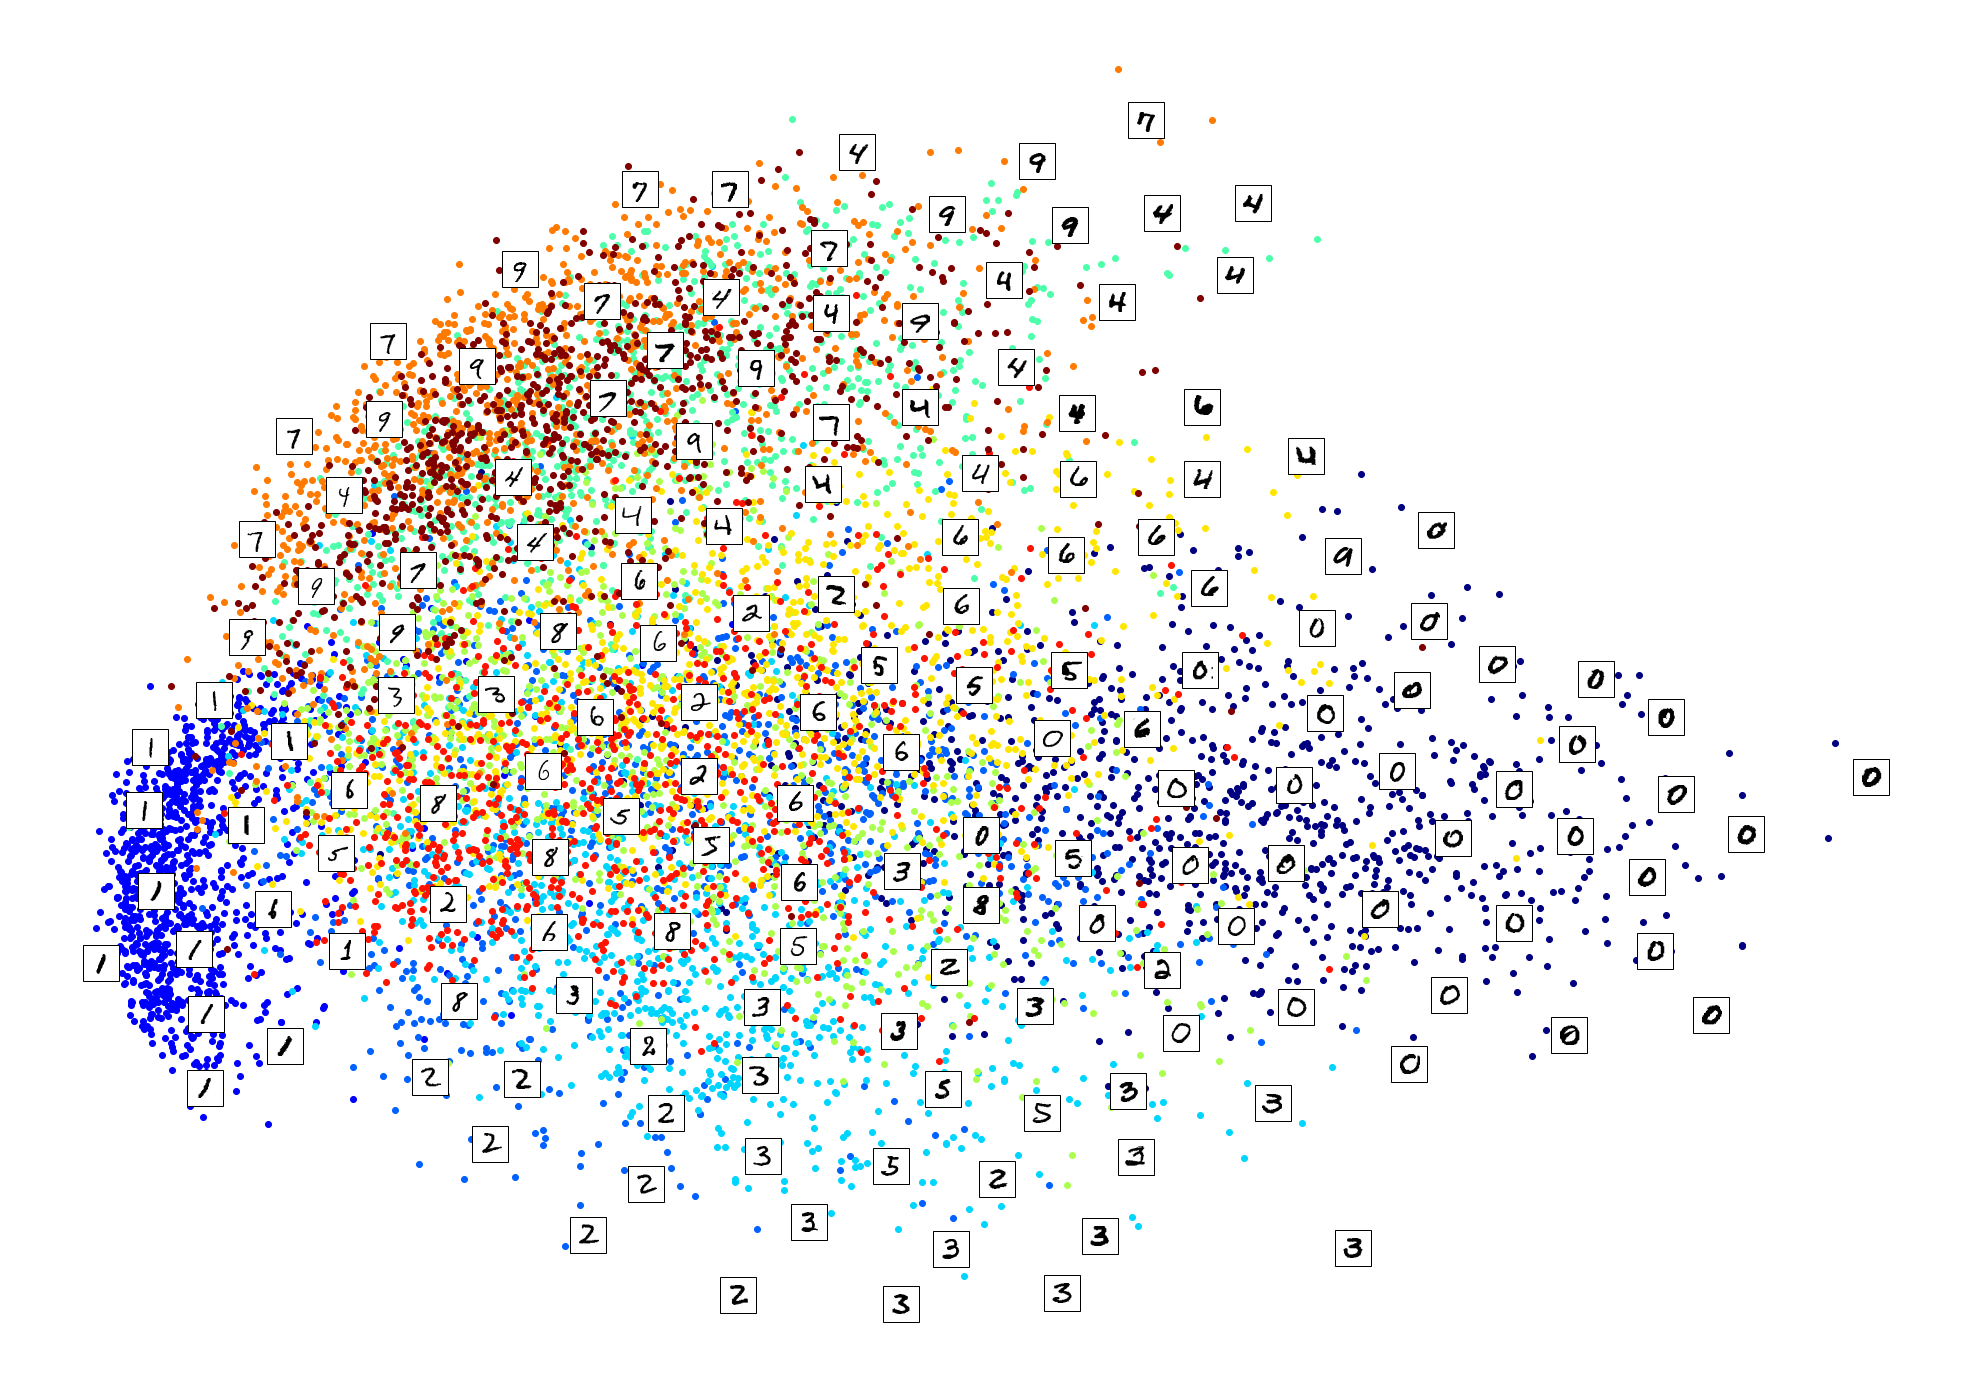

In [27]:
plot_digits(X2D, y, images=X, figsize=(35, 25))

In [28]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=42)

start = time.time()
X_reduced_lle = lle.fit_transform(X)
end = time.time()
print(end - start)

15.051345348358154


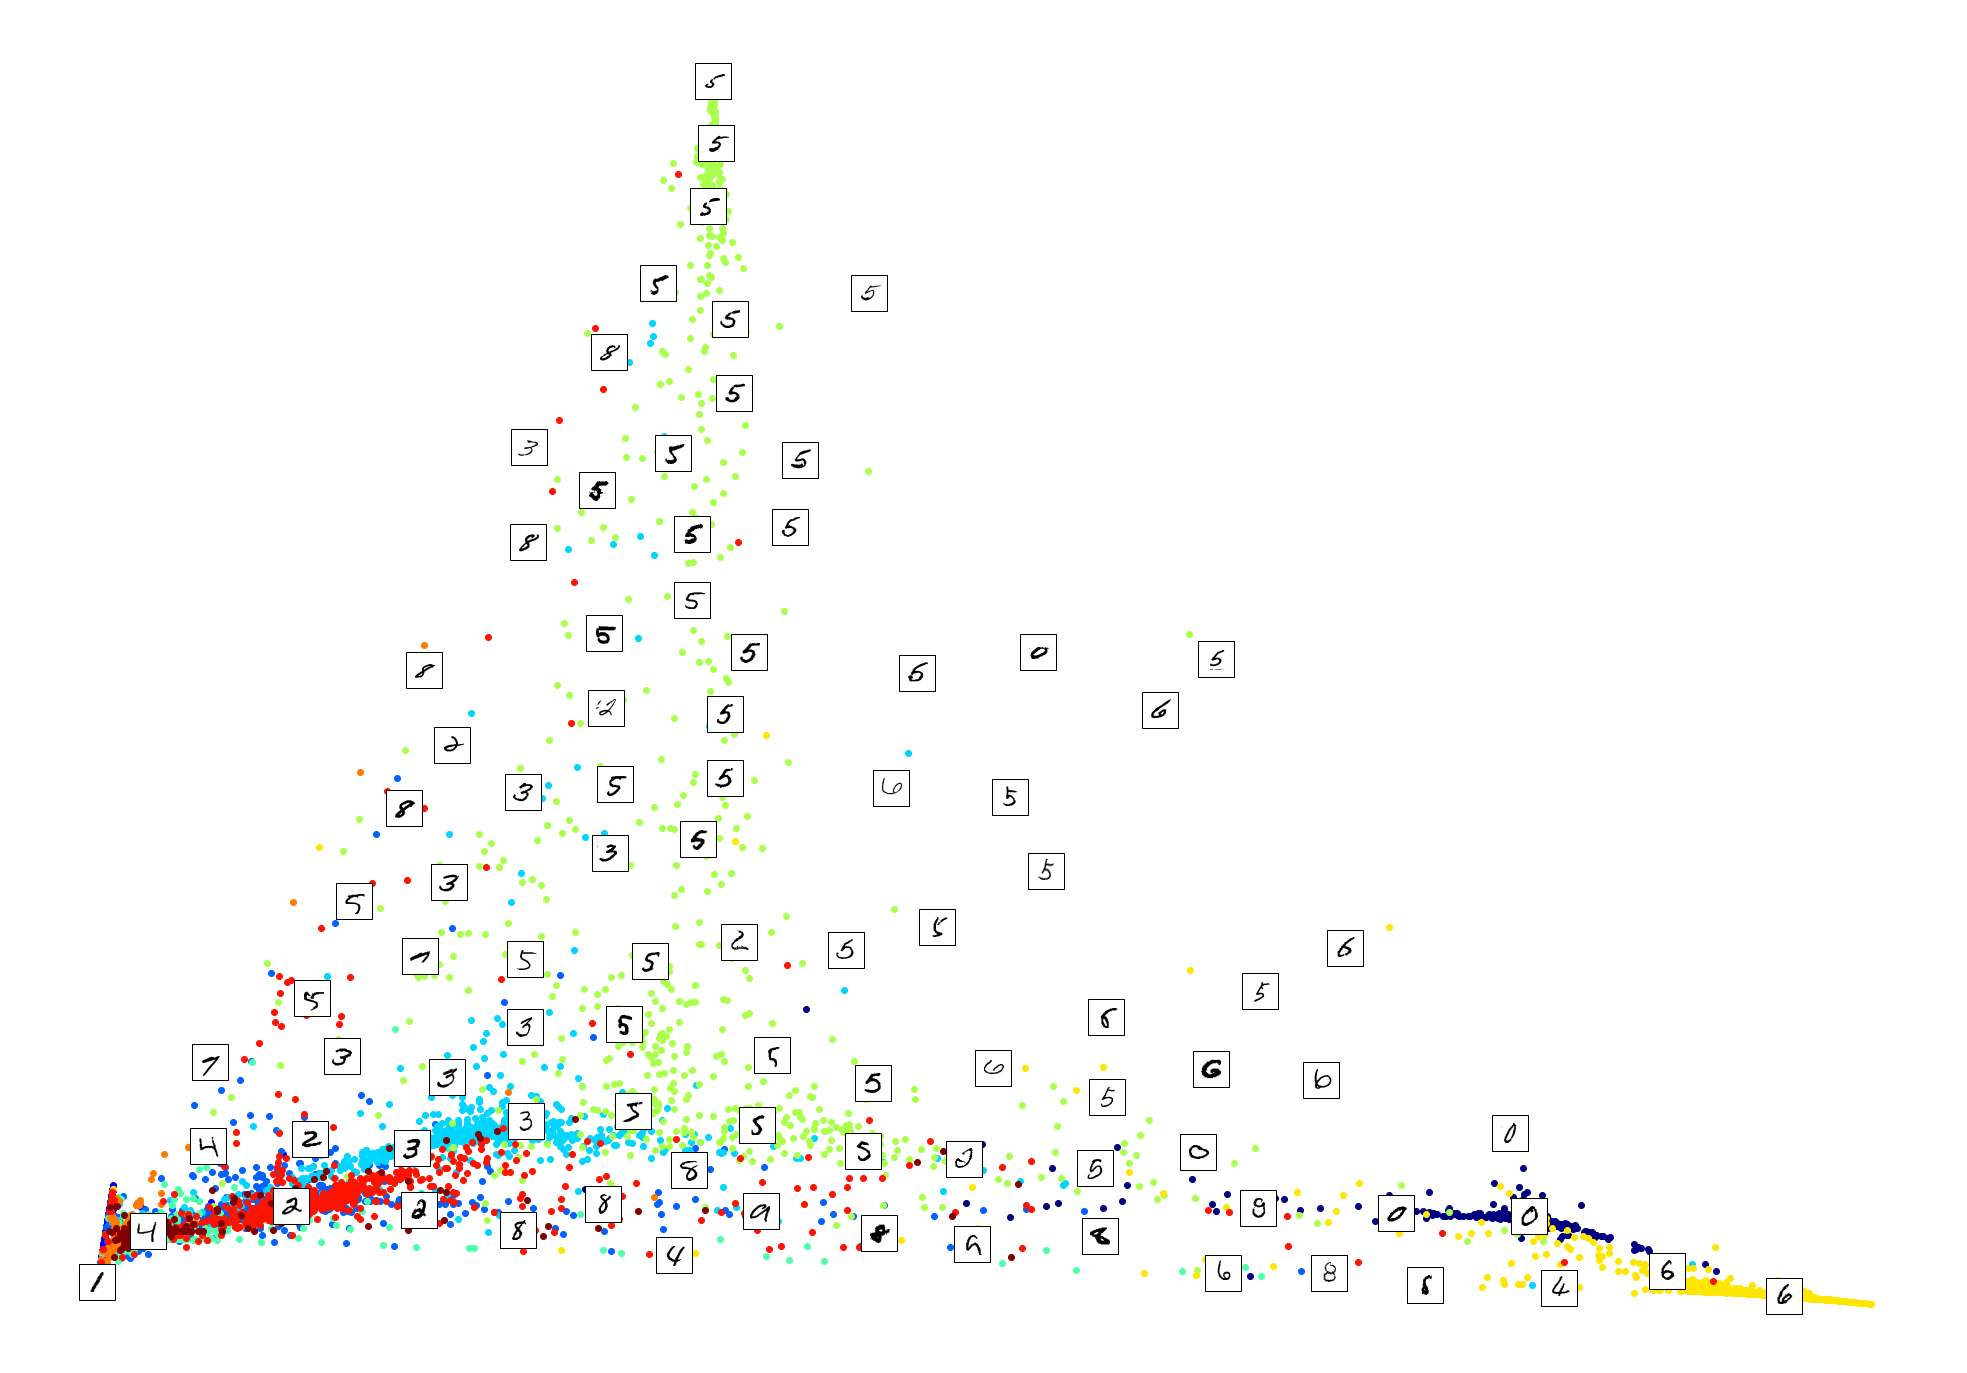

In [29]:
plot_digits(X_reduced_lle, y, images=X, figsize=(35, 25))

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)

start = time.time()
X95D = pca.fit_transform(X)

tsne2 = TSNE(n_components=2, random_state=42, n_jobs=-1)

X_reduced_PCA_tsne = tsne.fit_transform(X95D)
end = time.time()
print(end - start)

66.44233202934265


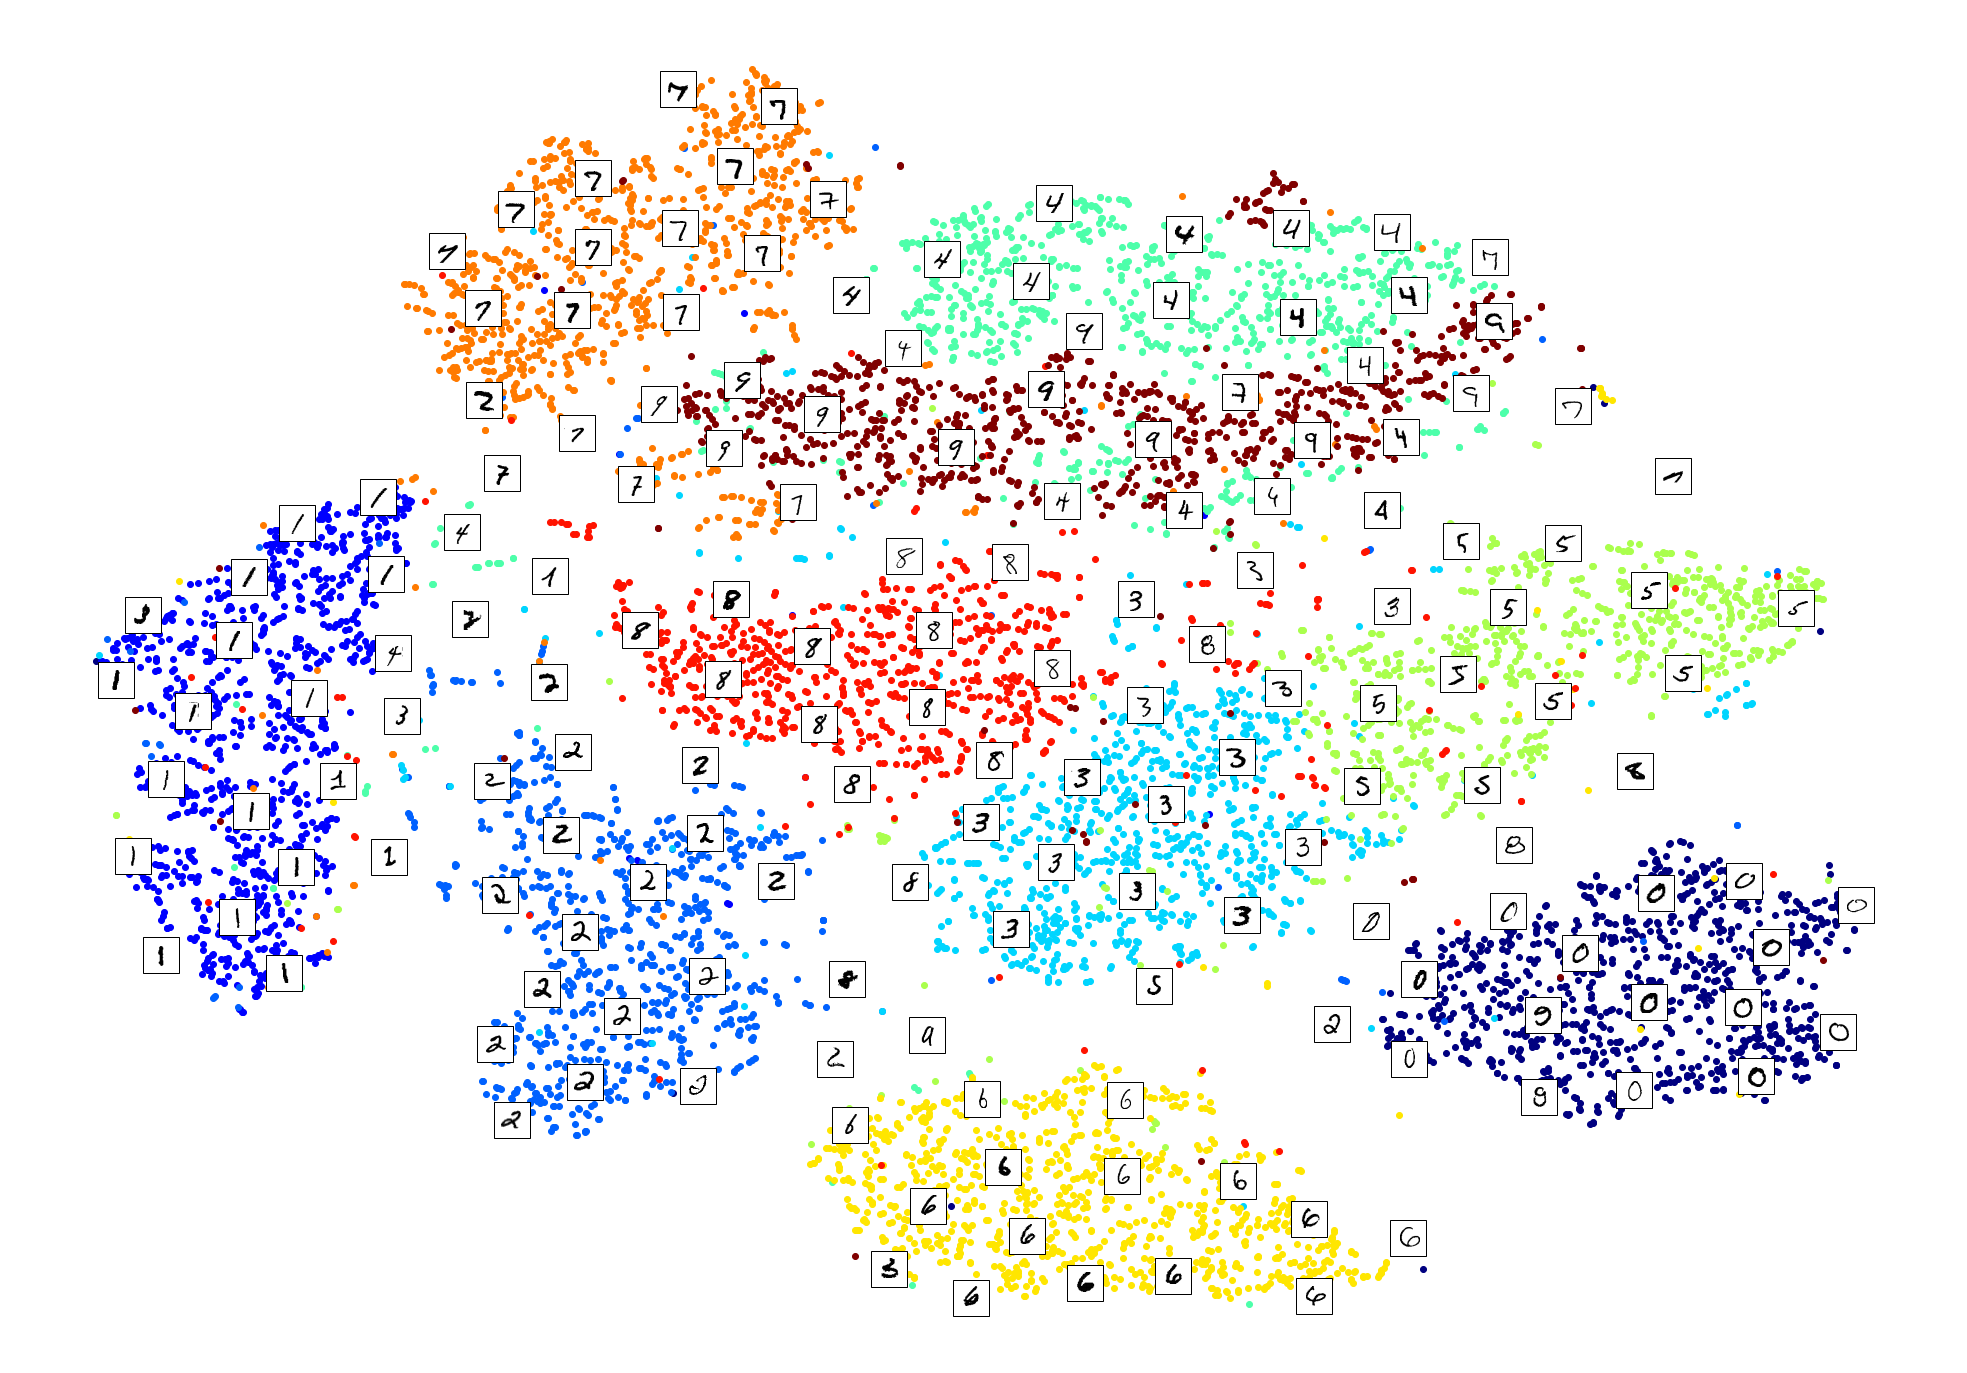

In [31]:
plot_digits(X_reduced_PCA_tsne, y, images=X, figsize=(35, 25))

In [32]:
print("It appears that the LLE model ran the fastest but that the TSNE with PCA predictors resulted in the best clustering.")

It appears that the LLE model ran the fastest but that the TSNE with PCA predictors resulted in the best clustering.


**[Add your solution here]**

# 3. k-Means clustering [11 marks]

Hint: It is helpful to read the solution of Chapter 9, Question 10 in this [Jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb).

## (a) Chapter 9, Question 10 [6 marks]


The classic Olivetti faces dataset contains 400 grayscale $64\times 64$ pixel images of faces. Each image is flattened to a 1D vector of size 4096. 40 different people were photographed (10 times each), and the task is to train a model that can predict which person is represented in each picture. Load the dataset and split it into a training set and a validation set using the code below. Since the dataset is quite small, stratified sampling is used to ensure that there are the same number of images per person in each set. There is no need to create a test set.

In [33]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_olivetti_faces()
# Creatingvalidation set
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=120, random_state=42)
train_idx, val_idx = next(strat_split.split(data.data, data.target))
X_valid, y_valid = data.data[val_idx], data.target[val_idx]
# Creating training set
X_train, y_train = data.data[train_idx], data.target[train_idx]

Note that the dataset is already scaled between 0 and 1, so there is no need to use a standard scaler. Next, use PCA on the features with an explained variance ratio of 99%. Then cluster the images based on the reduced features using k-Means, where the argument `random_state=42` is included. To determine the number of clusters $k\in\{5,10,15,\dots,145\}$, (i) plot inertia, (ii) plot silhouette scores. Choose the number of clusters $k'$ based on (ii). Then (iii) plot silhouette diagrams where the number of clusters is 40 and $k'$, and explain which number of clusters is better. Finally, suppose we use $k'$ clusters, (iv) visualize the clusters by plotting the images in each cluster and comment on whether you see similar faces in each cluster.

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.99, random_state = 42)
X_train_PCA = pca.fit_transform(X_train)
X_valid_PCA = pca.transform(X_valid)

pca.n_components_

200

In [35]:
#cluster the images based on the reduced features using K-Means
from sklearn.cluster import KMeans
import numpy as np

k_range = range(5,150,5) #range of beginning point 5, end point 150, and in steps of 5
kmeans_per_k = []
for k in k_range:
#     print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state = 42).fit(X_train_PCA)
    kmeans_per_k.append(kmeans) #stores the different models (with the different k values)


In [36]:
# for i in range(5,150,5):
#     print(i)

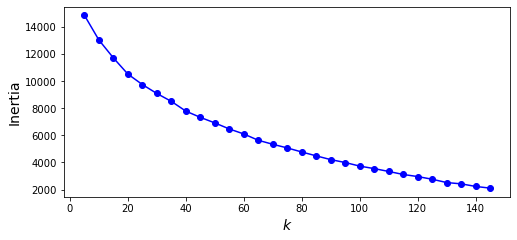

In [37]:
import matplotlib.pyplot as plt
#plot inertia, look for an elbow to find an optimal k
inertias = [model.inertia_ for model in kmeans_per_k]
# best_inertia = inertias[best_index]

plt.figure(figsize=(8,3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.plot(best_k, best_inertia, "rs")
plt.show()

There is no distinct elbow to determine an optimal k. Let's look at the silhouette scores.

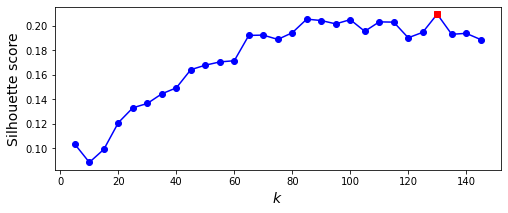

In [38]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_PCA, model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [39]:
print(best_k)
print(best_index)

fourty_k_index = 7

130
25


In [40]:
print(best_index)


25


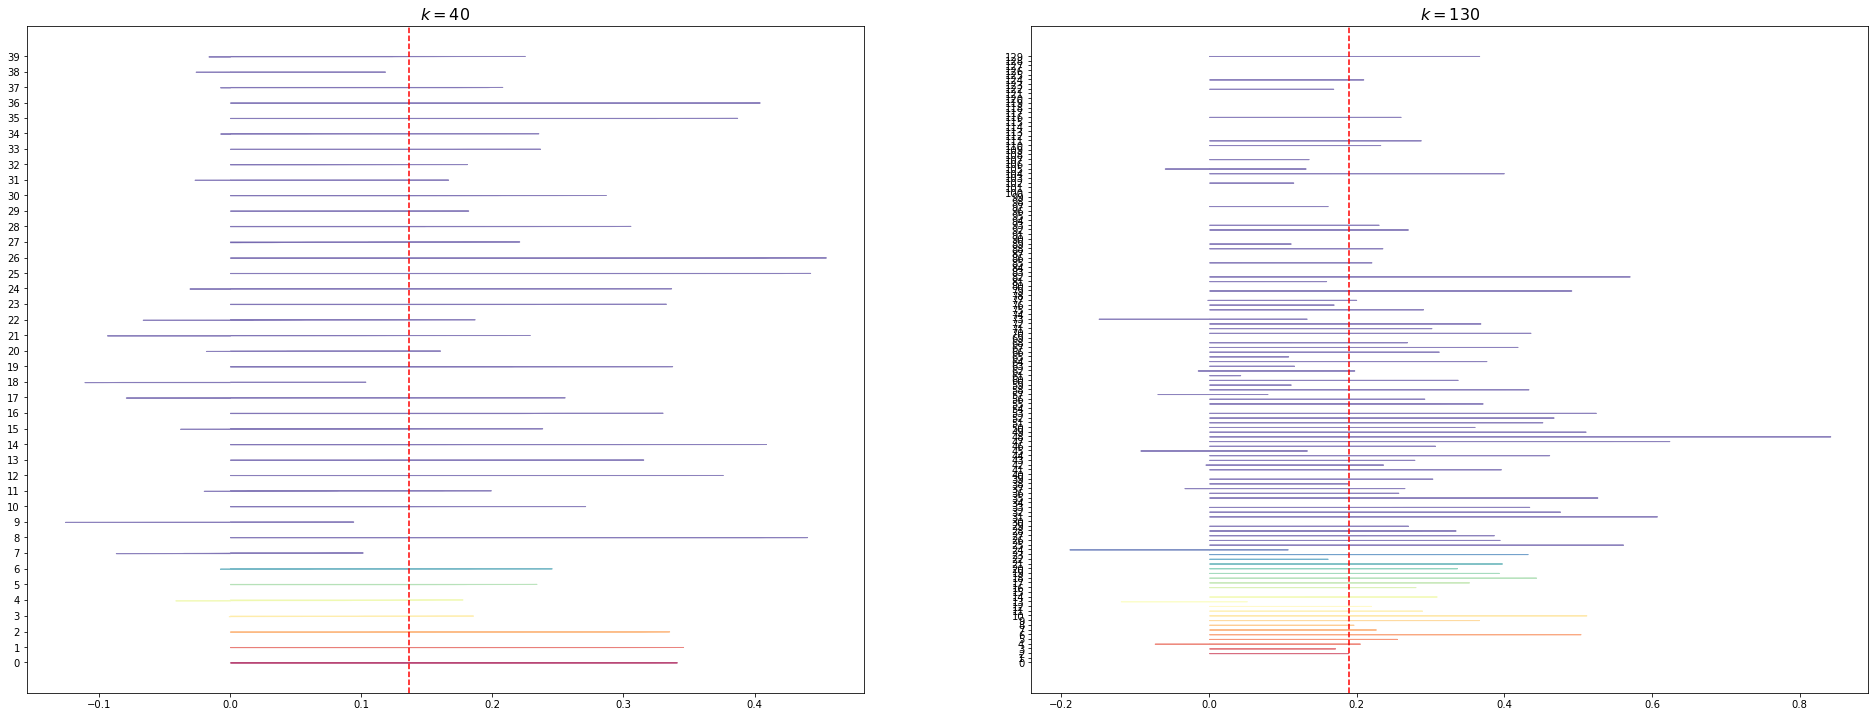

In [41]:
#this is the code for the silhouette scores
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
%matplotlib inline
import matplotlib as mpl

plt.figure(figsize=(11*3, 9*3))
# we want to use the k's at best_index and at index 7 is where it is at 40
kmeans = KMeans(n_clusters=best_k, random_state = 42).fit(X_train_PCA)

j = 0
for k in ((fourty_k_index, best_index)):
    j += 1
    plt.subplot(2, 2, j)
    
    y_pred = kmeans_per_k[k].labels_
    silhouette_coefficients = silhouette_samples(X_train_PCA, y_pred)

    padding = len(X_train_PCA) 
    pos = padding
    ticks = []
    for i in range(k_range[k]):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k_range[k])))
#     if k in (3, 5):
#         plt.ylabel("Cluster")
    
#     if k in (5, 6):
#         plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
#         plt.xlabel("Silhouette Coefficient")
#     else:
#         plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k_range[k]), fontsize=16)

# save_fig("silhouette_analysis_plot")
plt.show()

**It appeears that 130 silhouettes are more consistent than 40.**

In [42]:
best_model = kmeans_per_k[best_index]

Cluster 0


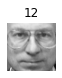

Cluster 1


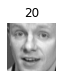

Cluster 2


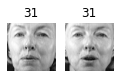

Cluster 3


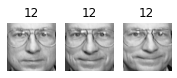

Cluster 4


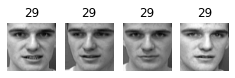

Cluster 5


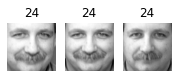

Cluster 6


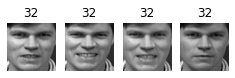

Cluster 7


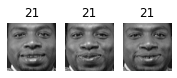

Cluster 8


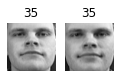

Cluster 9


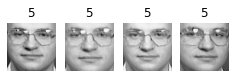

Cluster 10


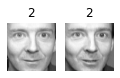

Cluster 11


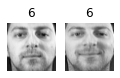

Cluster 12


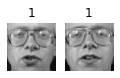

Cluster 13


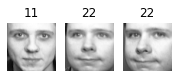

Cluster 14


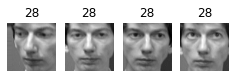

Cluster 15


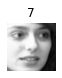

Cluster 16


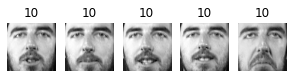

Cluster 17


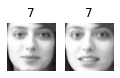

Cluster 18


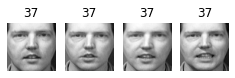

Cluster 19


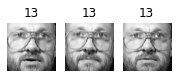

Cluster 20


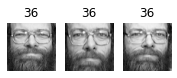

Cluster 21


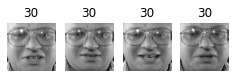

Cluster 22


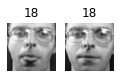

Cluster 23


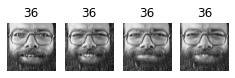

Cluster 24


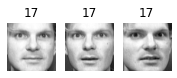

Cluster 25


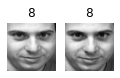

Cluster 26


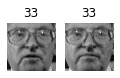

Cluster 27


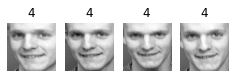

Cluster 28


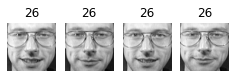

Cluster 29


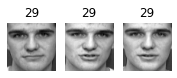

Cluster 30


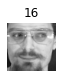

Cluster 31


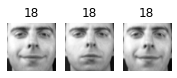

Cluster 32


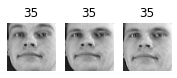

Cluster 33


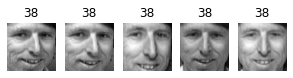

Cluster 34


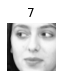

Cluster 35


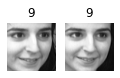

Cluster 36


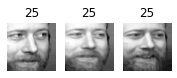

Cluster 37


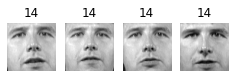

Cluster 38


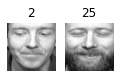

Cluster 39


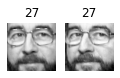

Cluster 40


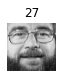

Cluster 41


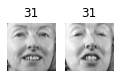

Cluster 42


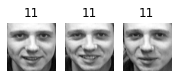

Cluster 43


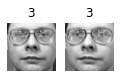

Cluster 44


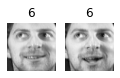

Cluster 45


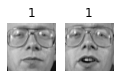

Cluster 46


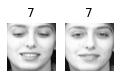

Cluster 47


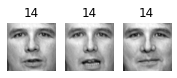

Cluster 48


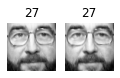

Cluster 49


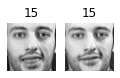

Cluster 50


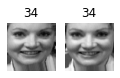

Cluster 51


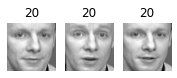

Cluster 52


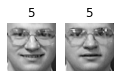

Cluster 53


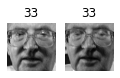

Cluster 54


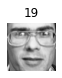

Cluster 55


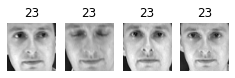

Cluster 56


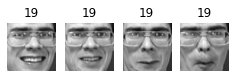

Cluster 57


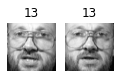

Cluster 58


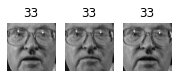

Cluster 59


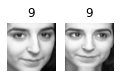

Cluster 60


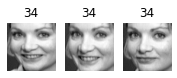

Cluster 61


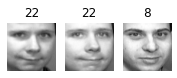

Cluster 62


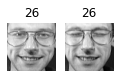

Cluster 63


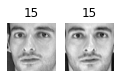

Cluster 64


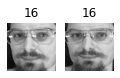

Cluster 65


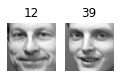

Cluster 66


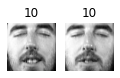

Cluster 67


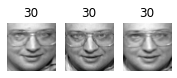

Cluster 68


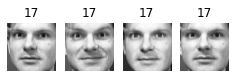

Cluster 69


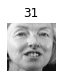

Cluster 70


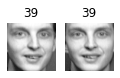

Cluster 71


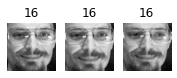

Cluster 72


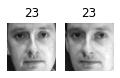

Cluster 73


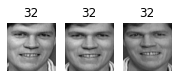

Cluster 74


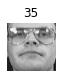

Cluster 75


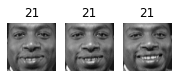

Cluster 76


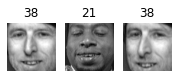

Cluster 77


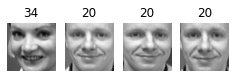

Cluster 78


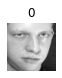

Cluster 79


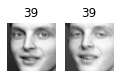

Cluster 80


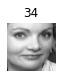

Cluster 81


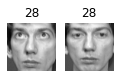

Cluster 82


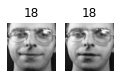

Cluster 83


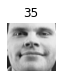

Cluster 84


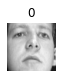

Cluster 85


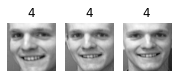

Cluster 86


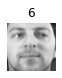

Cluster 87


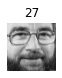

Cluster 88


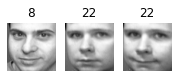

Cluster 89


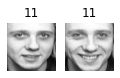

Cluster 90


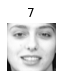

Cluster 91


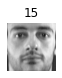

Cluster 92


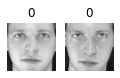

Cluster 93


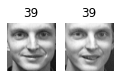

Cluster 94


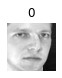

Cluster 95


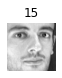

Cluster 96


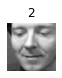

Cluster 97


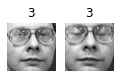

Cluster 98


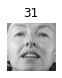

Cluster 99


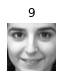

Cluster 100


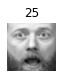

Cluster 101


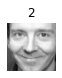

Cluster 102


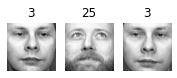

Cluster 103


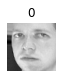

Cluster 104


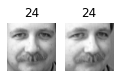

Cluster 105


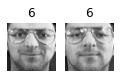

Cluster 106


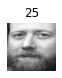

Cluster 107


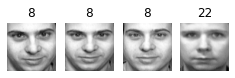

Cluster 108


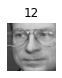

Cluster 109


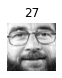

Cluster 110


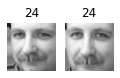

Cluster 111


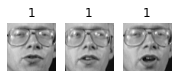

Cluster 112


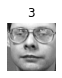

Cluster 113


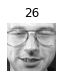

Cluster 114


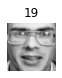

Cluster 115


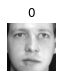

Cluster 116


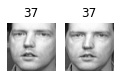

Cluster 117


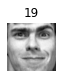

Cluster 118


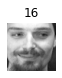

Cluster 119


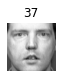

Cluster 120


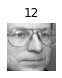

Cluster 121


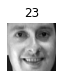

Cluster 122


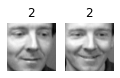

Cluster 123


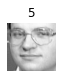

Cluster 124


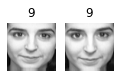

Cluster 125


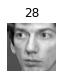

Cluster 126


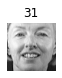

Cluster 127


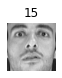

Cluster 128


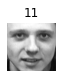

Cluster 129


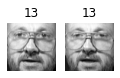

In [43]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Most of the clusters include similar faces. One notiecable false positive was in cluster 77 where a lady was included with photos of another man.

**[Add your solution here]**

## (b) Chapter 9, Question 11  [5 marks]

Continue to use the reduced features based on PCA in (a). Train a random forest classifier `RandomForestClassifier(n_estimators=150, random_state=42)` to predict which person is represented in each picture, and evaluate it on the validation set. Next, use k-Means as a dimensionality reduction tool, and train a classifier. Search for the number of clusters $k\in\{5,10,15,\dots,145\}$ that allows the classifier to get the best performance on the validation set. What performance can you reach on the validation set? What if you append the features from the reduced set to the original features and again search for the best number of clusters?

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# rfc = RandomForestClassifier(n_estimators = 150, random_state=42, n_jobs=-1)
# rfc.fit(X_train_PCA, y_train)
# rfc.score(X_valid_PCA, y_valid)

In [45]:
# #using the best classifier from Q3) a)


# X_train_reduced = best_model.transform(X_train_PCA)
# X_valid_reduced = best_model.transform(X_valid_PCA)


In [46]:
from sklearn.pipeline import Pipeline

k_range = range(5,150,5) #range of beginning point 5, end point 150, and in steps of 5
kmeans_per_k = []

for k in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=k, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1))
    ])
    pipeline.fit(X_train_PCA, y_train)
    print(k, pipeline.score(X_valid_PCA, y_valid))

# rfc2 = RandomForestClassifier(n_estimators=150, random_state=42)
# rfc2.fit(X_train_reduced, y_train)
    
# rfc2.score(X_valid_reduced, y_valid)


5 0.38333333333333336
10 0.5333333333333333
15 0.575
20 0.6583333333333333
25 0.6833333333333333
30 0.725
35 0.6916666666666667
40 0.75
45 0.7416666666666667
50 0.775
55 0.75
60 0.7583333333333333
65 0.8083333333333333
70 0.7583333333333333
75 0.7833333333333333
80 0.7833333333333333
85 0.775
90 0.7916666666666666
95 0.775
100 0.775
105 0.8083333333333333
110 0.825
115 0.8166666666666667
120 0.8083333333333333
125 0.7916666666666666
130 0.8166666666666667
135 0.7916666666666666
140 0.8083333333333333
145 0.825


In [47]:
X_train_merge = np.concatenate((X_train,X_train_PCA), axis=1)
X_valid_merge = np.concatenate((X_valid,X_valid_PCA), axis=1)

k_range = range(5,150,5) #range of beginning point 5, end point 150, and in steps of 5
kmeans_per_k = []
# for k in k_range:
#     kmeans = KMeans(n_clusters=k, random_state = 42).fit(X_train_PCA)
#     kmeans_per_k.append(kmeans) #stores the different models (with the different k values)

In [48]:
from sklearn.pipeline import Pipeline

for k in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=k, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1))
    ])
    pipeline.fit(X_train_merge, y_train)
    print(k, pipeline.score(X_valid_merge, y_valid))

5 0.425
10 0.5916666666666667
15 0.6833333333333333
20 0.7
25 0.7583333333333333
30 0.7333333333333333
35 0.7333333333333333
40 0.775
45 0.7416666666666667
50 0.7833333333333333
55 0.8
60 0.8
65 0.875
70 0.8
75 0.7833333333333333
80 0.8583333333333333
85 0.8083333333333333
90 0.8083333333333333
95 0.8333333333333334
100 0.8
105 0.85
110 0.8333333333333334
115 0.825
120 0.875
125 0.8583333333333333
130 0.8416666666666667
135 0.8416666666666667
140 0.85
145 0.8583333333333333


In [49]:
print(k_range[12])
best_index=12
print("Based on the accuracy scores above, k =",k_range[best_index], "produces the highest accuracy score.")
# best_k=120

65
Based on the accuracy scores above, k = 65 produces the highest accuracy score.


In [50]:
# from sklearn.metrics import silhouette_score

# silhouette_scores = [silhouette_score(X_train_PCA, model.labels_) for model in kmeans_per_k]
# best_index = np.argmax(silhouette_scores)
# best_k = k_range[best_index]
# best_score = silhouette_scores[best_index]

# plt.figure(figsize=(8, 3))
# plt.plot(k_range, silhouette_scores, "bo-")
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Silhouette score", fontsize=14)
# plt.plot(best_k, best_score, "rs")
# plt.show()

In [51]:
# print(best_k)

The best number of clusters in result is 130 after appending the original data points with the reduced ones.

**[Add your solution here]**

# 4. Finding regimes in time series [12 marks]

## (a) [6 marks]
Obtain the daily values of the CPI and unemployment rate from FRED up to 2021-06-01 and then convert the CPI into the yearly inflation rate `inf_data` using the following code. Note that you may have to install the package `pandas_datareader`. Alternatively, you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/91707964/download?download_frd=1).

In [70]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler

unemp_data = pdr.get_data_fred('UNRATE', datetime(1945,1,1),datetime(2021,6,1))
cpi_data = pdr.get_data_fred('CPIAUCSL', datetime(1945,1,1),datetime(2021,6,1))
inf_data = (cpi_data/cpi_data.shift(12)-1).iloc[12:]
data = pd.concat([inf_data, unemp_data],axis=1)


In [71]:
data_prep = StandardScaler().fit_transform(data)
data_prep = pd.DataFrame(data_prep, columns = ["CPIAUCSL","UNRATE"])
data_prep = data_prep.set_index(data.index)

In [72]:
data_prep[0:5]
# data.head()

,CPIAUCSL,UNRATE
DATE,,
1948-01-01,2.346877,-1.393916
1948-02-01,2.084121,-1.158493
1948-03-01,1.163319,-1.040782
1948-04-01,1.666119,-1.099638
1948-05-01,2.050592,-1.335060


Split the data into a training set (before Jan 2005, using `data[:"2005-1-1"]` for instance) and a test set (Jan 2005 and after). Now, ignore the time aspect of your training set by treating it as a 2-dimensional dataset. Use k-means to divide your training set into a number of clusters called **regimes**. To find the number of regimes (clusters) $k\in\{2,3,\dots,10\}$: (i) plot inertia, (ii) plot silhouette scores, (iii) plot silhouette diagrams for $k\in\{2,3,\dots,10\}$. How many regimes do you choose? Explain your answer. Recall that you should use a standard scaler before applying k-means.

In [73]:
X_train = data_prep.loc[:"2005-1-1"]
X_test = data_prep.loc["2005-2-1":]
# X_test.head()

In [89]:
len(X_train)

685

In [74]:
from sklearn.cluster import KMeans
import numpy as np

k_range = range(2,10,1) #range of beginning point 5, end point 150, and in steps of 5
kmeans_per_k = []
for k in k_range:
#     print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state = 42).fit(X_train)
    kmeans_per_k.append(kmeans) #stores the different models (with the different k values)


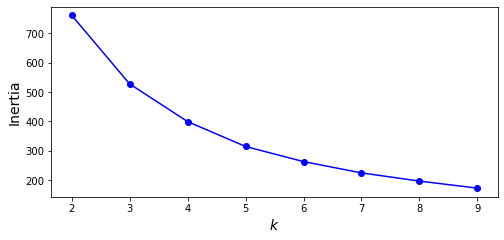

In [75]:
import matplotlib.pyplot as plt
#plot inertia, look for an elbow to find an optimal k
inertias = [model.inertia_ for model in kmeans_per_k]
# best_inertia = inertias[best_index]

plt.figure(figsize=(8,3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.plot(best_k, best_inertia, "rs")
plt.show()

In [76]:
len(kmeans_per_k)

8

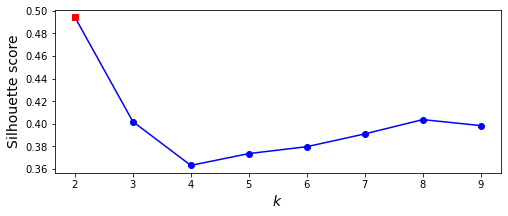

In [77]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train, model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [95]:
best_model = kmeans_per_k[0]

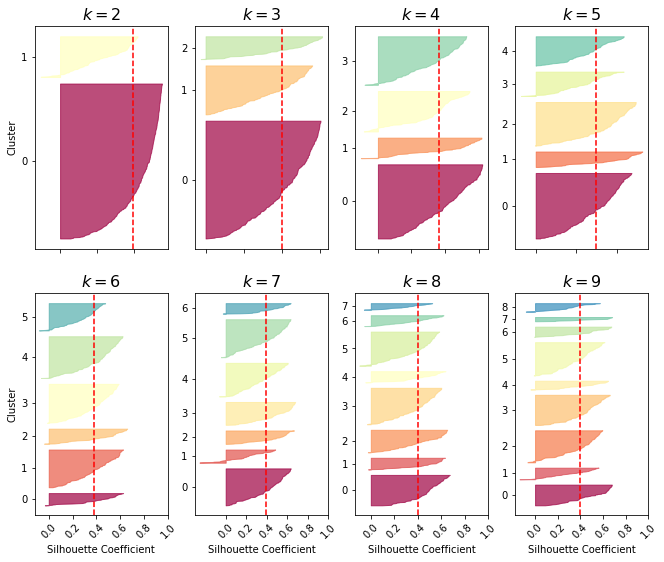

In [96]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


plt.figure(figsize=(11, 9))

j=0
for k in range(2,10,1):
    j+=1
    plt.subplot(2, 4, j)
    
    y_pred = kmeans_per_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(X_train, y_pred)

    padding = len(X_train) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2,6):
        plt.ylabel("Cluster")
    
    if k in (6,7,8,9):
        plt.gca().set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xticks(rotation=45)
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_plot")
plt.show()

Two regimes (k=2) should be chosen because k=2 has the highest silhouette score of the options, even though it is not at the elbow of the inertia graph. 

**[Add your solution here]**

## (b) [3 marks]

Report the centroid of the regimes in (a). For the training set, plot the inflation rate (x-axis) vs unemployment rate (y-axis) after these features have been standardized, and show the regimes and centroids in the plot. Also plot time series of the inflation rate and unemployment rate (the original series before standardization), and show the regimes on the plot. The regimes can be shown using time series (line graphs) of the centroid for each of two series for instance.

In [100]:
centroids = [best_model.cluster_centers_]
print("The coordinates of the two centroids:",centroids)

The coordinates of the two centroids: [array([[-0.28271751, -0.27783196],
       [ 1.74741137,  0.67878748]])]


In [101]:
# centroids[0]
centroids = np.reshape(centroids, (2,2))

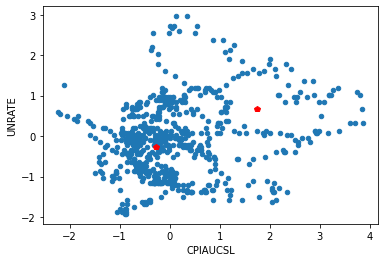

In [102]:
X_train.plot(x="CPIAUCSL", y = "UNRATE", kind="scatter")
plt.plot(centroids[0,0], centroids[0,1], "rp")
plt.plot(centroids[1,0], centroids[1,1], "rp")

plt.show()

In [103]:
def plot_data(X):
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2) #had to include the .iloc() method

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='w'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [104]:
# plot_data(X_train)

In [105]:
def plot_kmc(X, k, random_state=42):
    kmc = KMeans(n_clusters=k, random_state=random_state)
    kmc.fit(X_train)
    centeroids = kmc.cluster_centers_
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    resolution = 1000
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = kmc.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 4))
    plot_data(X)
    plot_centroids(centeroids)
    Z = Z.reshape(xx.shape)
    plt.contourf(
        Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
        cmap="Pastel2"
    )
    plt.contour(
        Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
        linewidths=1, colors='k'
    )
    plt.show()
    print("inertia = {}".format(kmc.inertia_))

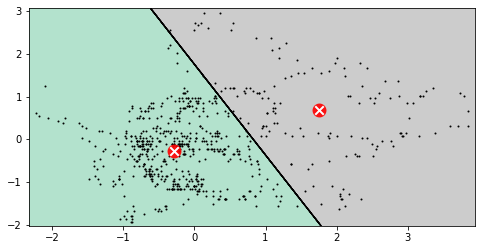

inertia = 761.2952716087774


In [106]:
plot_kmc(X_train, 2)

In [107]:
print(len(X_train))
print(len(CPI_cent))
len(best_model.labels_)

685
280


685

In [108]:
centroids_df = pd.DataFrame(centroids, columns=["CPIAUCSL","UNRATE"])
CPI_cent = []
UR_cent = []
for i in best_model.labels_:
    if i == 0:
        CPI_cent.append(centroids_df.iloc[0,0])
        UR_cent.append(centroids_df.iloc[0,1])
    else:
        CPI_cent.append(centroids_df.iloc[1,0])
        UR_cent.append(centroids_df.iloc[1,1])
        
CPI_cent = pd.DataFrame(CPI_cent, columns=["Centroid"])
CPI_cent = CPI_cent.set_index(X_train.index)
UR_cent = pd.DataFrame(UR_cent, columns=["Centroid"])
UR_cent = UR_cent.set_index(X_train.index)

In [109]:
CPI_cent.head()

,Centroid
DATE,
1948-01-01,1.747411
1948-02-01,1.747411
1948-03-01,-0.282718
1948-04-01,1.747411
1948-05-01,1.747411


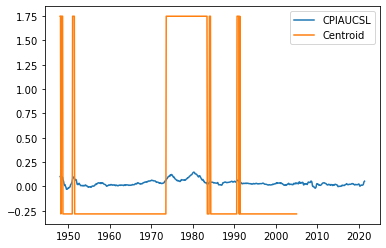

In [110]:
plt.plot(X_train["CPIAUCSL"]) #just for the training set as mentioned by professor in email.
plt.plot(CPI_cent)
plt.legend(["CPIAUCSL","Centroid"])
plt.show()

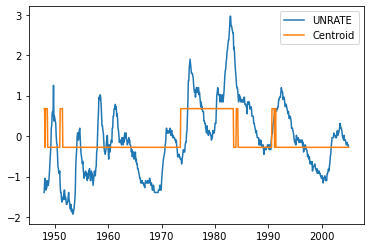

In [113]:
plt.plot(X_train["UNRATE"])
plt.plot(UR_cent)
plt.legend(["UNRATE","Centroid"])
plt.show()

In [112]:
# print(centroids_df)
# print(centroids)

Since we are plotting the centroids against the raw data, the scalings of the lines look off, and the centroids were calculated only for the training set (doesn't include the test set).

**[Add your solution here]**

## (c) [3 marks]

A regime-switching model is a probabilistic model that governs how regime transitions take place. A very simple regime-switching model is a Markov chain. Here, we assume that the next month's regime depends on the current regime. In other words, all we need to know are the **transition probabilities** $p_{i,j} = \mathbb{P}(X_{t+1}=j|X_t=i)$, where $X_t$ is the regime at day $t$. Using the time series of regimes in the training set that you found in (b), estimate these transition probabilities, as follows:
\begin{align*}
    p_{i,j} = \frac{\mathbb{P}(X_{t+1}=j \text{ and } X_t=i)}{\mathbb{P}(X_t=i)}\approx \frac{\text{number of transition from regime $i$ to $j$}}{\text{number of transition from regime $i$}}
\end{align*}
Next, let us check how good your regime switching model is. Calculate the transition probabilities using the test set. Do not retrain your k-means clusterer, simply use it to predict the regimes of the test set. Then, repeat the estimation of the transition probabilities on the test set.

Note: Depending on your choice of $k$, it is possible that some $p_{i,j}$ cannot be estimated due to  having no transitions from regime $i$.

In [114]:
counts = CPI_cent.value_counts()
n_i = counts.iloc[0]

j=0 #will count how many transitions from regime i to j occured
for i in range(1,len(CPI_cent),1):
    if np.float64(CPI_cent.iloc[i]) == np.float64(centroids_df.iloc[1,0]): #so if it equals the bigger centroid value
        if np.float64(CPI_cent.iloc[i]) != np.float64(CPI_cent.iloc[i-1]):
            j += 1
#             print(np.float64(CPI_cent.iloc[i-1]),np.float64(CPI_cent.iloc[i]))
n_itoj = j #this is the number of times there was a transition

In [115]:
# print(n_itoj)

#the transition probability is
p_ij = n_itoj/n_i
print("The probability of transition from regime i to j given that the previous lag value is i is:",'{:.3f}%'.format(p_ij*100))

The probability of transition from regime i to j given that the previous lag value is i is: 1.107%


In [116]:
#predictions on the test set
y_pred = best_model.predict(X_test)

j=0 #will count how many transitions from regime i to j occured
n_i = 0 #counts how many of the regimes are i (in this case 0)
for i in range(1,len(y_pred),1):
    if np.float64(y_pred[i]) == 1: #so if it equals the bigger centroid value
        if np.float64(y_pred[i]) != np.float64(y_pred[i-1]):
            j += 1
    if np.float64(y_pred[i]) == 0: #counts all the times the value belongs to regime 0
        n_i += 1
            
ntest_itoj = j


In [117]:
ptest_ij = ntest_itoj/n_i
print("One the test set, the probability of transition from regime i to j given that the previous lag value is i is:",'{:.3f}%'.format(ptest_ij*100))

One the test set, the probability of transition from regime i to j given that the previous lag value is i is: 1.613%


**[Add your solution here]**

# 5. Optional exercise: Neural Networks

There is nothing to submit for this exercise. However, it is strongly recommended that you spend time going through this exercise.

Visit the TensorFlow Playground at [https://playground.tensorflow.org/](https://playground.tensorflow.org/)

## (a)
**Layers and patterns:** Try training the default neural network by clicking the run button (top left). Notice how it quickly finds a good solution for the classification task. Notice that the neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers, the more complex the patterns can be.

## (b)
**Activation function:** Try replacing the Tanh activation function with the ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.

Try, also, the sigmoid (i.e. the logistic) activation function. Note that it will take significantly more time for the ANN to properly classify the dataset (you should wait until around 900 epochs).

## (c)

**Local minima:** Modify the network architecture to have just one hidden layer with three neurons and the ReLU activation function. Train it multiple times. Between each training, press the reset button next to the play button on the top left. Notice that the training time and the shape of the decision borders varies a lot. If you are patient enough, you will notice that sometimes the network gets stuck in a local minimum which does not properly separate the classes (this happens at random).

## (d)

**Not enough neurons:** Next, remove one neuron so that you have only one hidden layer with 2 neurons. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and it systematically underfits the training set.

## (e)
**Enough neurons:** Next, set the number of neurons to 8 and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck at local optima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.

## (f)

**DNNs and vanishing gradients:** Now change the dataset to be the spiral (bottom right dataset under “DATA”). Change the network architecture to have 4 hidden layers with 8 neurons each. Notice that training takes much longer, and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (i.e. on the right) tend to evolve faster than the neurons in the lowest layers (i.e. on the left). This problem, called the “vanishing gradients” problem, can be alleviated using better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or using Batch Normalization.